In [4]:
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

# <h1><center>Fire Predictor</center></h1>

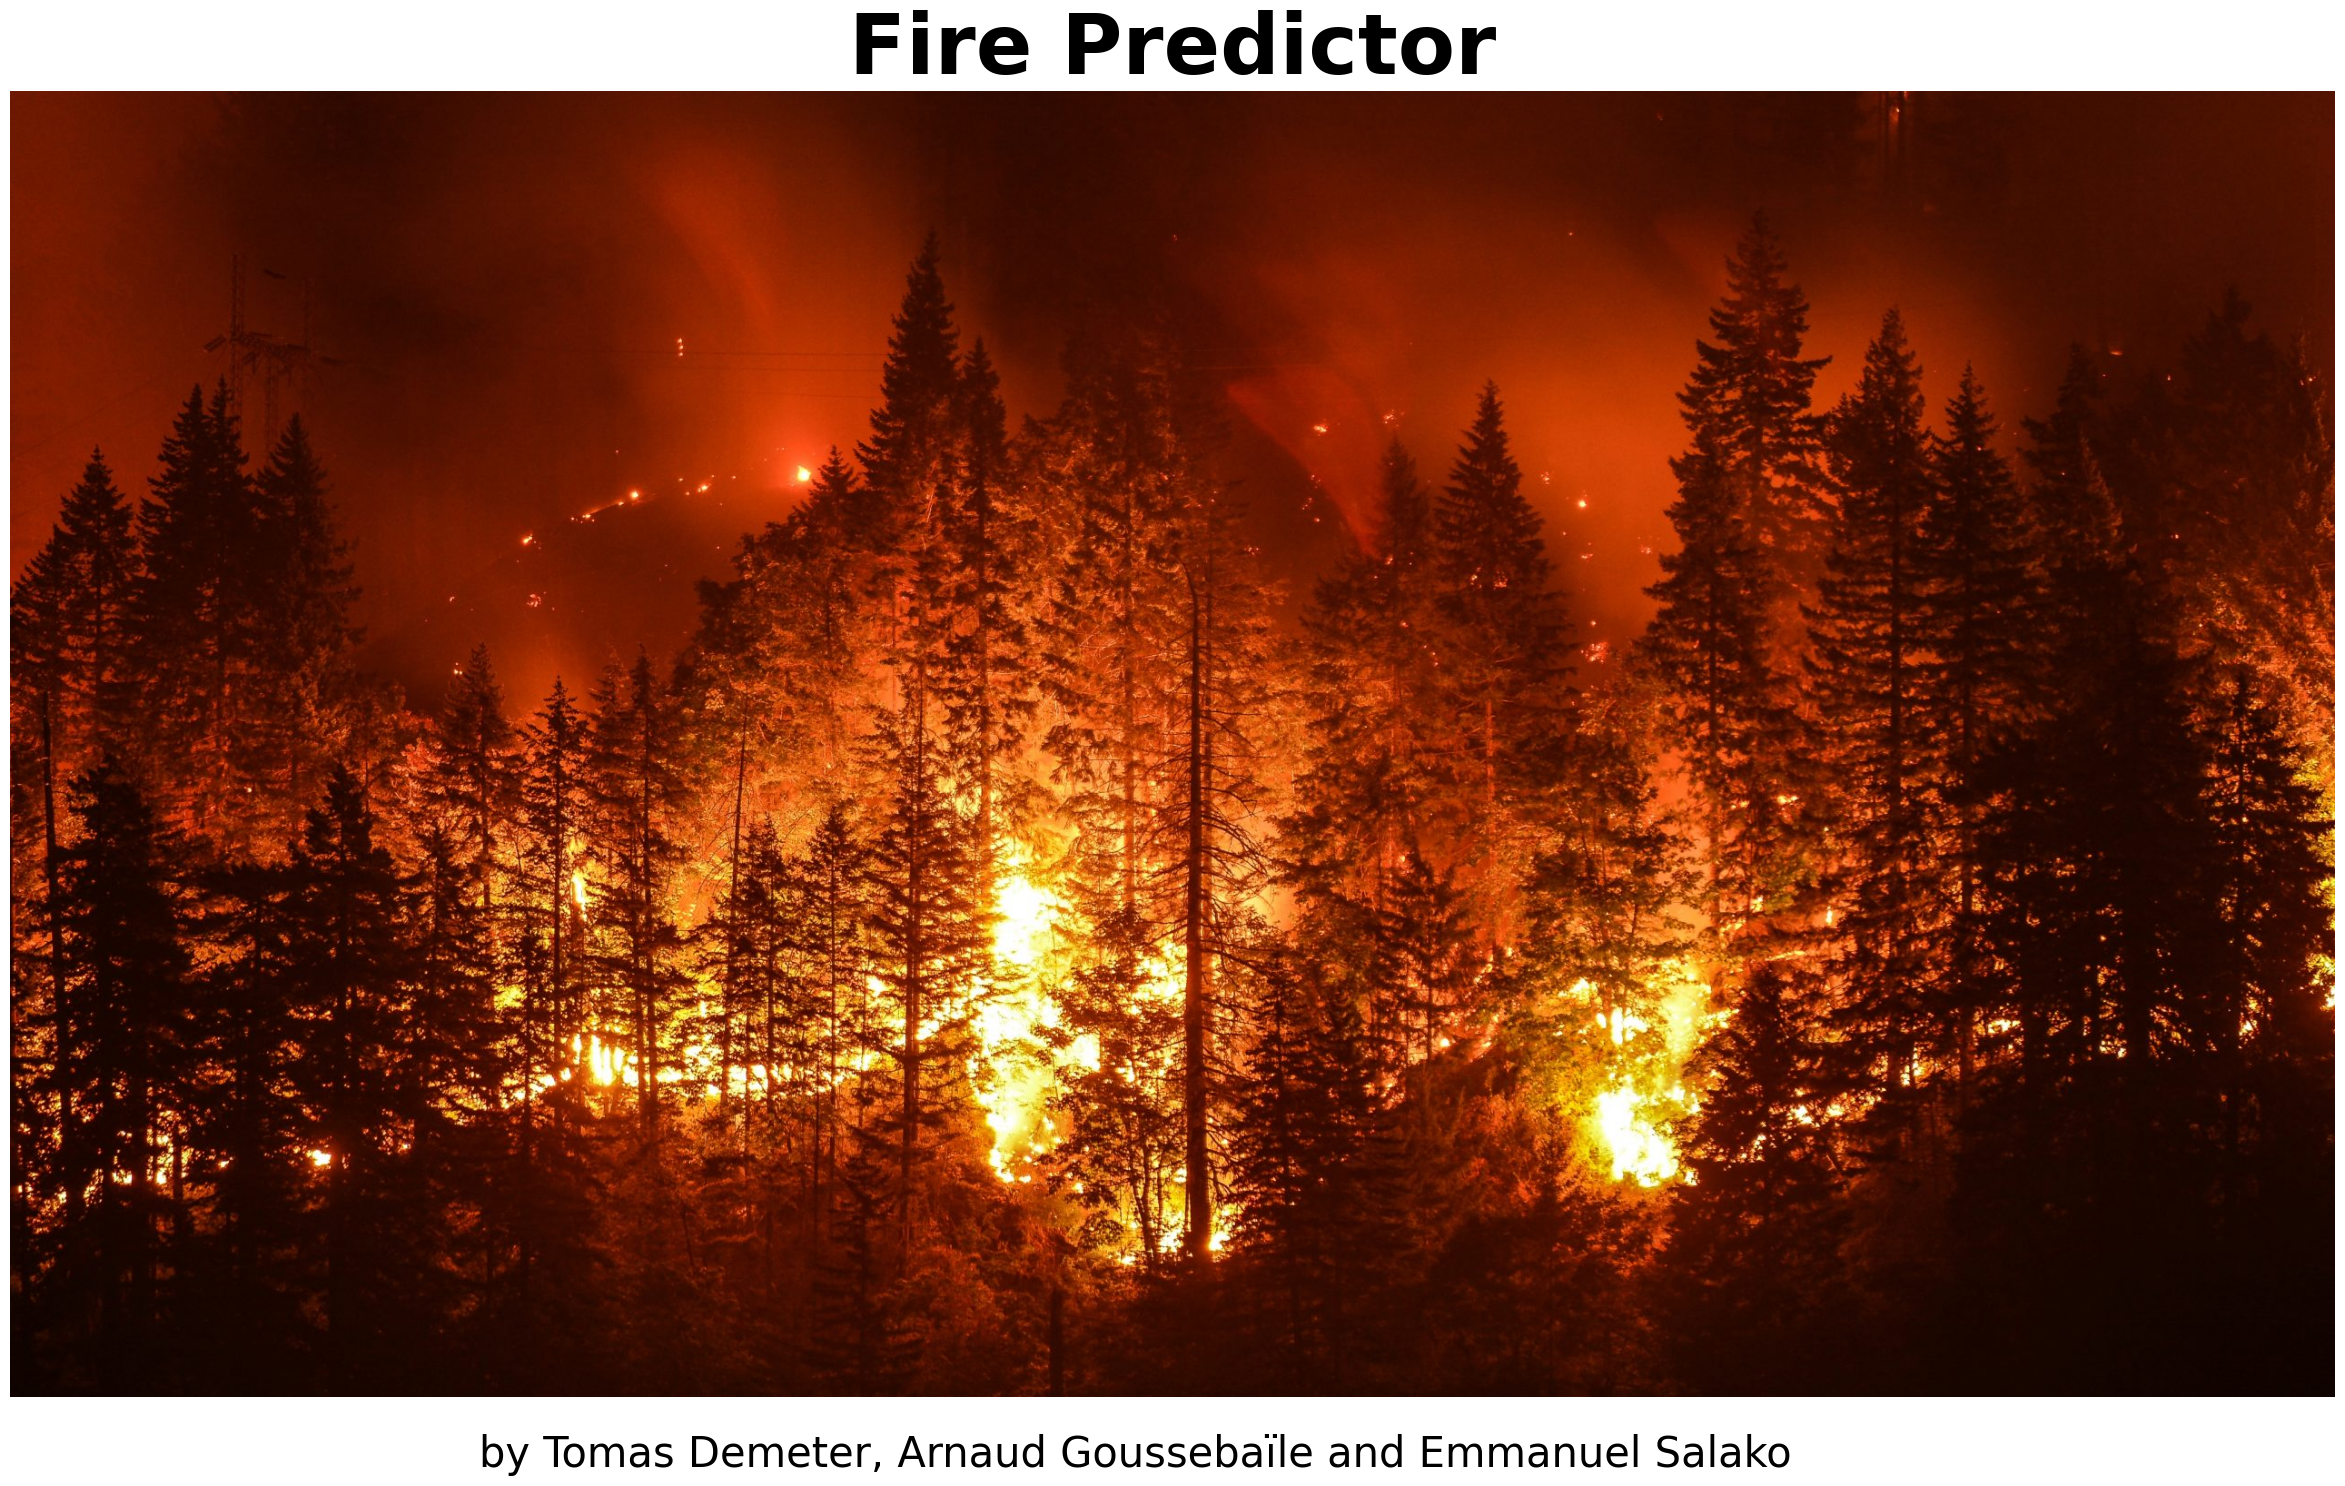

In [199]:
#Project title and Motivation

plt.figure(figsize=(30,20))
img = mpimg.imread('Wildfires.jpeg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.title('Fire Predictor', fontsize="60", fontweight="bold")
plt.suptitle('by Tomas Demeter, Arnaud Goussebaïle and Emmanuel Salako', y=0.15, fontsize=30)
plt.show()

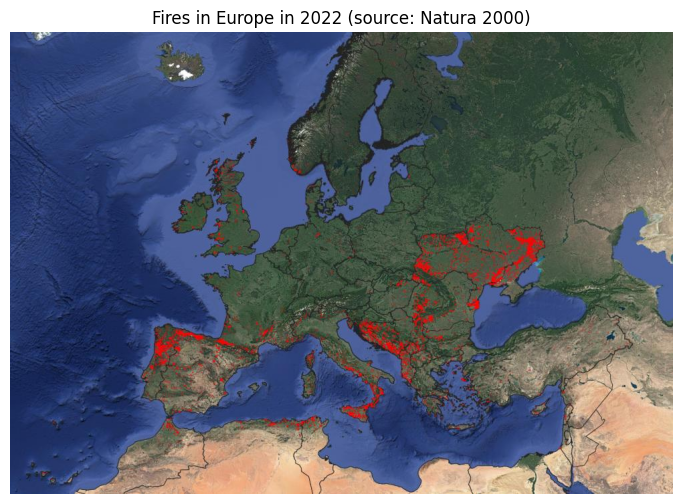

In [164]:
plt.figure(figsize=(10,6))
img = mpimg.imread('Europe_2022_Fires.jpeg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.title('Fires in Europe in 2022 (source: Natura 2000)', fontsize="12")
plt.show()

## <h1><center>Data</center></h1>

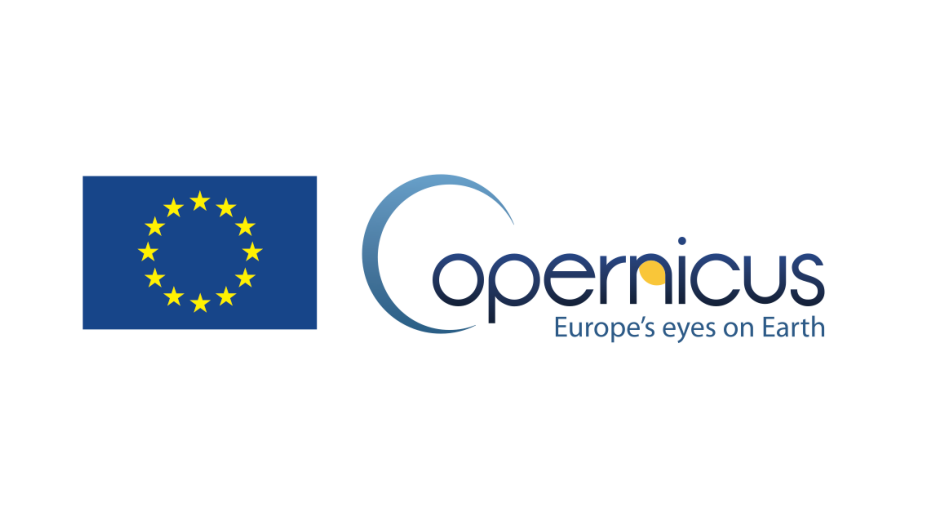

In [8]:
#Copernicus data with API

plt.figure(figsize=(12,7))
img = mpimg.imread('Copernicus_logo.png')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [62]:
#Download data

data_dir = '../data'
df = pd.read_csv(os.path.join(data_dir, 'all_merged.csv'))
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna()
df = df.reset_index()
df = df.drop(['index'], axis=1)
#df = df.drop(['temperature4','precipitation4'], axis=1)
df.head()

lon   lat  year  month  burned_area  burnable_frac  temperature  \
0 -8.25  33.0  2001      1            0       0.984497         13.5   
1 -8.25  33.0  2001      2            0       0.984497         14.2   
2 -8.25  33.0  2001      3            0       0.984497         17.2   
3 -8.25  33.0  2001      4            0       0.984497         18.0   
4 -8.25  33.0  2001      5            0       0.984497         19.2   

   precipitation  temperature1  precipitation1  temperature2  precipitation2  \
0      48.700000          14.7      105.200005     15.900001       20.000000   
1       8.900001          13.5       48.700000     14.700000      105.200005   
2      25.300001          14.2        8.900001     13.500000       48.700000   
3       1.800000          17.2       25.300001     14.200000        8.900001   
4       9.300000          18.0        1.800000     17.200000       25.300001   

   temperature3  precipitation3  temperature4  precipitation4  dry_days  \
0     18.800001       31.900000     23.100000        7.800000   119.675   
1     15.900001       20.000000     18.800001       31.900000   119.675   
2     14.700000      105.200005     15.900001       20.000000   119.675   
3     13.500000       48.700000     14.700000      105.200005   119.675   
4     14.200000        8.900001     13.500000       48.700000   119.675   

   land_cover                  country  
0          11  Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب  
1          11  Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب  
2          11  Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب  
3          11  Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب  
4          11  Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب

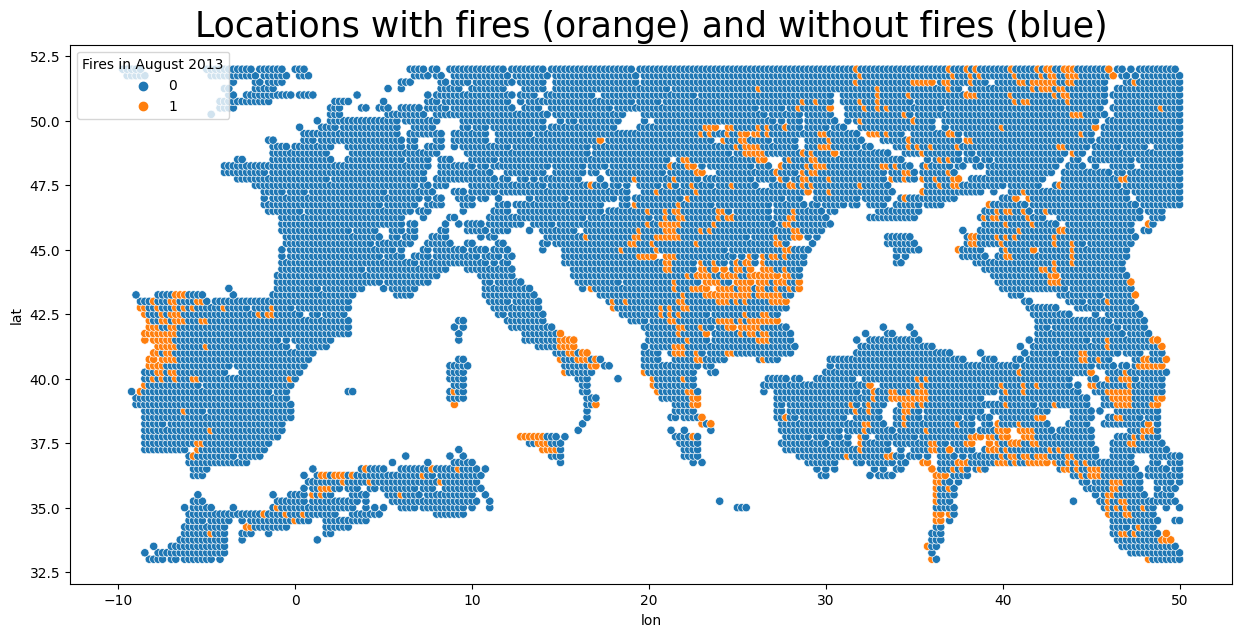

In [182]:
year = 2013
month = 8
df_plotting = df[(df['year'] == year) & (df['month'] == month)]

plt.figure(figsize=(15,7))
sns.scatterplot(data=df_plotting, x='lon', y='lat', hue = 'burned_area')
plt.legend(loc='upper left', title=f'Fires in August {year}')
plt.title('Locations with fires (orange) and without fires (blue)', fontsize="25");

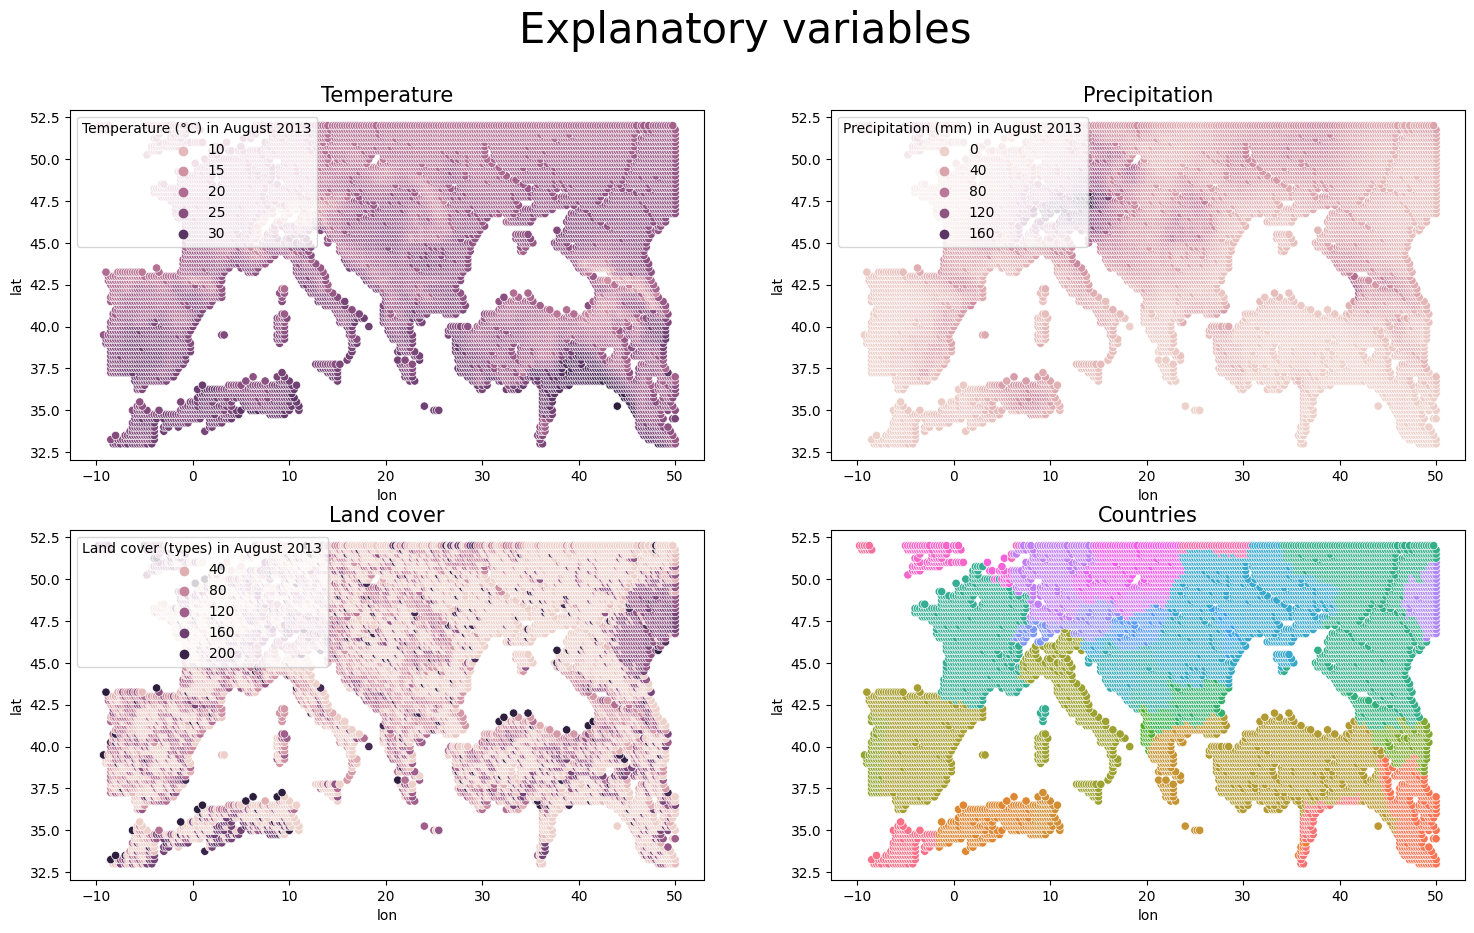

In [181]:
year = 2013
month = 8
df_plotting = df[(df['year'] == year) & (df['month'] == month)]

fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Explanatory variables', fontsize="30")

sns.scatterplot(ax=axes[0,0], data=df_plotting, x='lon', y='lat', hue = 'temperature')
axes[0,0].set_title('Temperature', fontsize="15")
axes[0,0].legend(loc='upper left', title=f'Temperature (°C) in August {year}')

sns.scatterplot(ax=axes[0,1], data=df_plotting, x='lon', y='lat', hue = 'precipitation')
axes[0,1].set_title('Precipitation', fontsize="15")
axes[0,1].legend(loc='upper left', title=f'Precipitation (mm) in August {year}')

sns.scatterplot(ax=axes[1,0], data=df_plotting, x='lon', y='lat', hue = 'land_cover')
axes[1,0].set_title('Land cover', fontsize="15")
axes[1,0].legend(loc='upper left', title=f'Land cover (types) in August {year}')

sns.scatterplot(ax=axes[1,1], data=df_plotting, x='lon', y='lat', hue = 'country', legend=None)
axes[1,1].set_title('Countries', fontsize="15");


### - Data: Southern Europe per 0,25 latitude and 0,25 longitude between 2001 and 2016 per month
### - Output: observation affected by a fire or not (binary)
### - Features: all previously shown plus longitude, latitude, year, month, and combination of features

## <h1><center>Model</center></h1>

### 1. Balance data because only 10% of observations have fires
### 2. Preprocess data (floats standardized and categories encoded) 
### 3. Estimate with XGBoost Classifier (a sequential tree classifier)

### <h1><center>Model score?</center></h1>

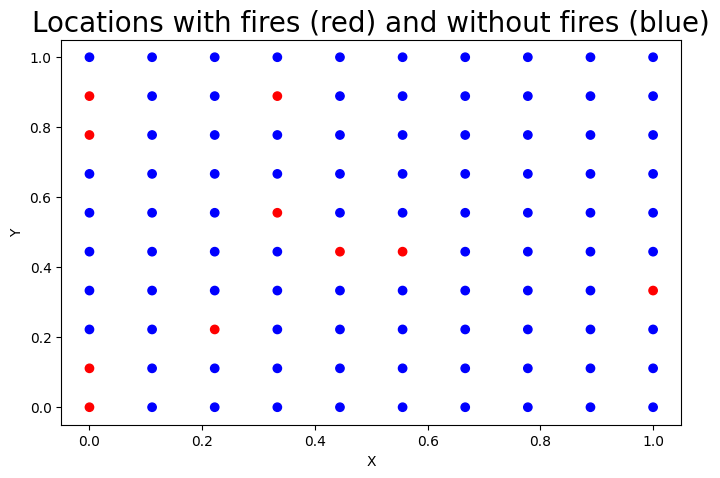

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# Set the number of points and the ratio of red points
num_points_per_direction = 10
num_points = num_points_per_direction ** 2
red_ratio = 0.1

# Set the step size based on the number of points in each direction
step_size = 1.0 / (num_points_per_direction - 1)

# Generate the x and y values with regular steps
x = np.linspace(0, 1.0, num_points_per_direction)
y = np.linspace(0, 1.0, num_points_per_direction)

# Generate the grid for plotting
X, Y = np.meshgrid(x, y)

# Reshape the grid to create a flat list of points
X_flat = X.flatten()
Y_flat = Y.flatten()

# Generate the colors with random assignment
np.random.seed(42)  # For reproducibility
colors = np.array(['blue'] * num_points)
red_indices = np.random.choice(num_points, size=int(num_points * red_ratio), replace=False)
colors[red_indices] = 'red'

# Plot the points
plt.figure(figsize=(8,5))
plt.scatter(X_flat, Y_flat, c=colors)

# Find the indices of one red point and nine blue points
red_point_index = red_indices[0]
blue_point_indices = np.random.choice(np.delete(np.arange(num_points), red_point_index), size=9, replace=False)

# Get the coordinates of the red and blue points
red_point = [X_flat[red_point_index], Y_flat[red_point_index]]
blue_points = [[X_flat[i], Y_flat[i]] for i in blue_point_indices]

# Set plot title and labels
plt.title('Locations with fires (red) and without fires (blue)', fontsize="20")
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()

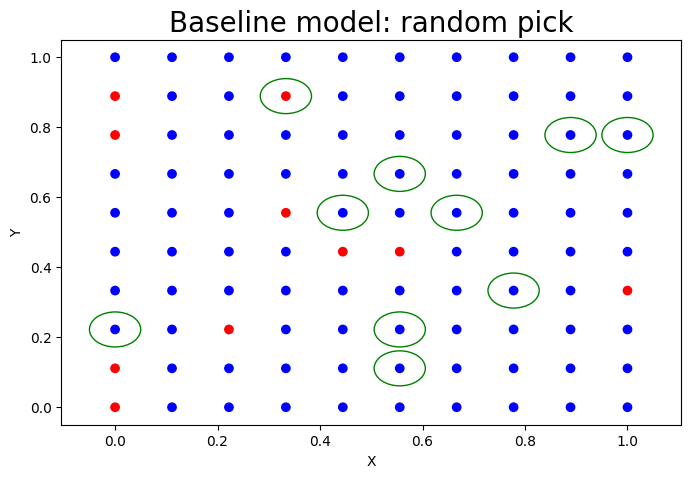

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Set the number of points and the ratio of red points
num_points_per_direction = 10
num_points = num_points_per_direction ** 2
red_ratio = 0.1

# Set the step size based on the number of points in each direction
step_size = 1.0 / (num_points_per_direction - 1)

# Generate the x and y values with regular steps
x = np.linspace(0, 1.0, num_points_per_direction)
y = np.linspace(0, 1.0, num_points_per_direction)

# Generate the grid for plotting
X, Y = np.meshgrid(x, y)

# Reshape the grid to create a flat list of points
X_flat = X.flatten()
Y_flat = Y.flatten()

# Generate the colors with random assignment
np.random.seed(42)  # For reproducibility
colors = np.array(['blue'] * num_points)
red_indices = np.random.choice(num_points, size=int(num_points * red_ratio), replace=False)
colors[red_indices] = 'red'

# Plot the points
plt.figure(figsize=(8,5))
plt.scatter(X_flat, Y_flat, c=colors)

# Find the indices of one red point and nine blue points
red_point_index = red_indices[0]
blue_point_indices = np.random.choice(np.delete(np.arange(num_points), red_point_index), size=9, replace=False)

# Get the coordinates of the red and blue points
red_point = [X_flat[red_point_index], Y_flat[red_point_index]]
blue_points = [[X_flat[i], Y_flat[i]] for i in blue_point_indices]

# Plot green circles around the red and blue points
circle_radius = 0.05
circle_color = 'green'
for point in [red_point] + blue_points:
    plt.gca().add_patch(plt.Circle(point, circle_radius, color=circle_color, fill=False))

# Set plot title and labels
plt.title('Baseline model: random pick', fontsize="20")
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()

### <center>Recall score: 10%</center>

### <center>Precision score: 10%</center>

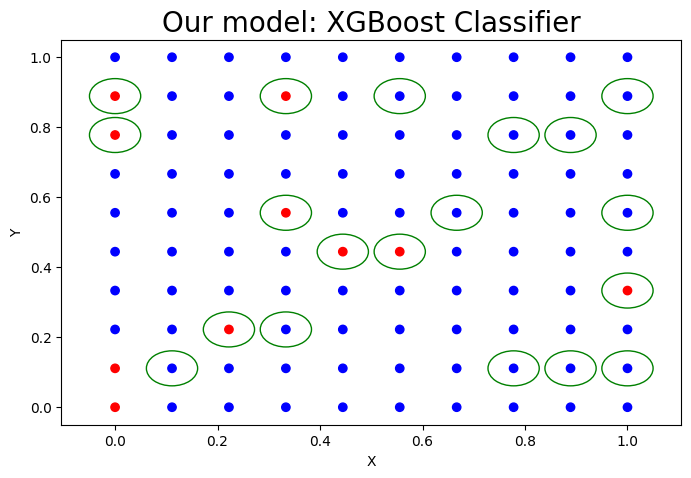

In [179]:
import matplotlib.pyplot as plt
import numpy as np

# Set the number of points and the ratio of red points
num_points_per_direction = 10
num_points = num_points_per_direction ** 2
red_ratio = 0.1

# Set the step size based on the number of points in each direction
step_size = 1.0 / (num_points_per_direction - 1)

# Generate the x and y values with regular steps
x = np.linspace(0, 1.0, num_points_per_direction)
y = np.linspace(0, 1.0, num_points_per_direction)

# Generate the grid for plotting
X, Y = np.meshgrid(x, y)

# Reshape the grid to create a flat list of points
X_flat = X.flatten()
Y_flat = Y.flatten()

# Generate the colors with random assignment
np.random.seed(42)  # For reproducibility
colors = np.array(['blue'] * num_points)
red_indices = np.random.choice(num_points, size=int(num_points * red_ratio), replace=False)
colors[red_indices] = 'red'

# Plot the points
plt.figure(figsize=(8,5))
plt.scatter(X_flat, Y_flat, c=colors)

# Find the indices of 8 red points and 11 blue points
red_point_indices = red_indices[:8]
blue_point_indices = np.random.choice(np.delete(np.arange(num_points), red_indices), size=11, replace=False)

# Get the coordinates of the red and blue points
red_points = [[X_flat[i], Y_flat[i]] for i in red_point_indices]
blue_points = [[X_flat[i], Y_flat[i]] for i in blue_point_indices]

# Plot green circles around the red points
circle_radius = 0.05
circle_color = 'green'
for point in red_points:
    plt.gca().add_patch(plt.Circle(point, circle_radius, color=circle_color, fill=False))

# Plot green circles around the blue points
for point in blue_points:
    plt.gca().add_patch(plt.Circle(point, circle_radius, color=circle_color, fill=False))

# Set plot title and labels
plt.title('Our model: XGBoost Classifier', fontsize="20")
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()

### <center>Recall score: 79%</center>

### <center>Precision score: 42%</center>

## <h1><center>Web App</center></h1>

<h1><center><a href="http://localhost:8501/">Web App</a></center></h1>